# Data Augmentation

## 本章節大綱
* [讀取資料](#讀取資料)
* [建立模型並訓練](#建立模型並訓練)
* [亮度 Brightness](#亮度-Brightness)
* [色調 Hue](#色調-Hue)
* [飽和度 Saturation](#飽和度-Saturation)
* [品質 Quality](品質-Quality)
* [翻轉 Flip](翻轉-Flip)
* [旋轉 Rotation](#旋轉-Rotation)
* [裁剪 Crop](#裁剪-Crop)
* [隨機 Zoom](#縮放-Zoom)
* [隨機高度 RandomHeight](#隨機高度-RandomHeight)
* [隨機寬度 RandomWidth](#隨機寬度-RandomWidth)
* [隨機平移 RandomTranslation](#隨機平移-RandomTranslation)
* [綜合](#整合)

## 匯入套件


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import glob  # 讀取特定格式路徑

import tensorflow as tf
from tensorflow.keras import layers

## 讀取路徑

In [7]:
# upload Data
!wget -q https://github.com/TA-aiacademy/course_3.0/releases/download/CVCNN_Data/cat_dog.zip
!unzip -q cat_dog

In [11]:
print(glob.glob('*'))  # 查看現在資料夾底下所有東西

['cat_dog', 'cat_dog.zip', 'sample_data']


In [12]:
print(glob.glob('cat_dog/*'))  # 查看 cat_dog 資料夾底下所有東西

['cat_dog/test', 'cat_dog/train']


In [13]:
print(glob.glob('cat_dog/*/*')[:5])  # 查看 cat_dog 資料夾底下兩層所有東西

['cat_dog/test/5011.jpg', 'cat_dog/test/11524.jpg', 'cat_dog/test/8216.jpg', 'cat_dog/test/8869.jpg', 'cat_dog/test/7975.jpg']


In [19]:
# 建立一個字典來存放路徑跟標籤資訊
data_dict={'file_name': [], 'type': []}
# 只拿 train 資料中的 .jpg 檔案
for i in glob.glob('cat_dog/train/*.jpg'):
    # i 會類似 cat_dog/train/cat.11996.jpg 
    data_dict['file_name'].append(i)
    # 字串處理取出檔案名稱前三個字元來判斷類別
    animal = i.split('/')[-1][:3]
    if animal == 'cat': 
        data_dict['type'].append(0)
    elif animal == 'dog':
        data_dict['type'].append(1)
    else:
        print(i)

In [20]:
# 將字典轉換成 DataFrame
datalist = pd.DataFrame(data_dict)

In [16]:
datalist.head()

file_name  type
0   cat_dog/train/dog.5718.jpg     1
1   cat_dog/train/cat.1728.jpg     0
2   cat_dog/train/cat.7951.jpg     0
3  cat_dog/train/dog.12359.jpg     1
4   cat_dog/train/dog.5475.jpg     1

In [53]:
import random
def my_preprocess(image):
    print('my_preprocess..0')
    image = cv2.resize(image, (256, 256))
    return image
def data_generater() : 
    # 打亂資料順序
    data = list(zip(datalist['file_name'],
                    datalist['type']))
    random.shuffle(data)
    # 讀取 data 中的資料，將路徑中的圖片一張一張讀取
    for path, label in data:
        image = cv2.imread(path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)# BGR2RGB 
        image = my_preprocess(image)
        # print('get pic')
        yield image, [1, 0] if label == 0 else [0, 1]

In [54]:
# 使用 tf.data.Dataset 製造一個 Dataset
# output_signature : 輸出的格式
dataset = tf.data.Dataset.from_generator(data_generater,
              output_signature=( 
              tf.TensorSpec(shape=(256,256,3), dtype=tf.float32),
              tf.TensorSpec(shape=(2), dtype=tf.float32)))
print(type(dataset))
print(dataset)

<class 'tensorflow.python.data.ops.dataset_ops.FlatMapDataset'>
<FlatMapDataset element_spec=(TensorSpec(shape=(256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(2,), dtype=tf.float32, name=None))>


my_preprocess..0
my_preprocess..0
my_preprocess..0
my_preprocess..0
my_preprocess..0
my_preprocess..0
my_preprocess..0
my_preprocess..0


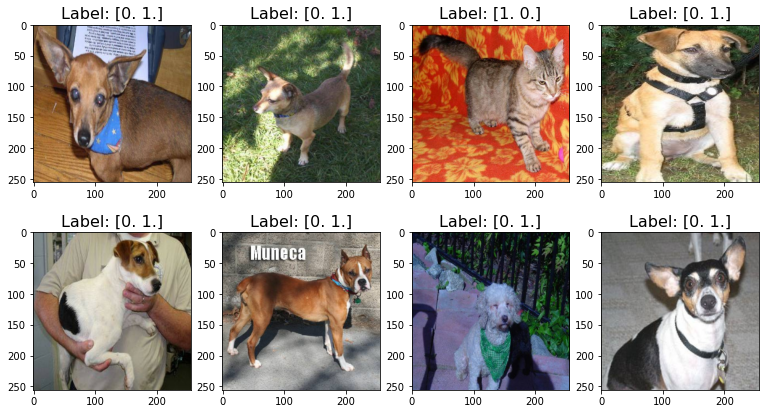

In [55]:
# 畫圖
def my_plot(datas):
    plt.figure(figsize=(13, 7))
    for i,data in enumerate(datas):
        plt.subplot(2, 4, i+1)
        plt.imshow(data[0].numpy().astype('uint8'))
        plt.title("Label: {}".format(data[1]), fontsize=16)
    plt.show()
my_plot(dataset.take(8))

---
# 資料擴增

## 圖像數值調整使用 tf.image
- 圖像數值：亮度、對比度、色調、飽和度、品質、翻轉

## 圖像形狀調整使用 tf.keras.layers
- 圖像形狀：剪裁、翻轉、旋轉、縮放、高度、寬度
---

* ## 亮度 Brightness

 * max_delta：調整的幅度，0 ~ 1

In [56]:
def my_preprocess(image):
    print('my_preprocess...1')
    image = cv2.resize(image, (256, 256))
    image = tf.image.random_brightness(image, 
                    max_delta = 0.4)  #-0.4 ~ +0.4
    image = tf.cast(image, tf.uint8)
    return image

my_preprocess...1
my_preprocess...1
my_preprocess...1
my_preprocess...1
my_preprocess...1
my_preprocess...1
my_preprocess...1
my_preprocess...1


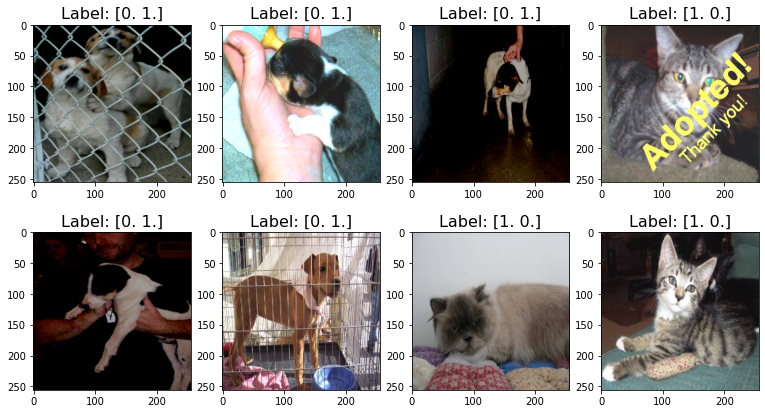

In [57]:
my_plot(dataset.take(8))

[(back...)](#本章節大綱)

* ## 對比度 Contrast

 * lower：對比下限，0 ~ 1
 * upper：對比上限，0 ~ 1

In [58]:
def my_preprocess(image):
    print('my_preprocess...2')
    image = cv2.resize(image, (256, 256))
    image = tf.image.random_contrast(image,
          lower=0.2,
          upper=0.7)
    image = tf.cast(image, tf.uint8)
    return image

my_preprocess...2
my_preprocess...2
my_preprocess...2
my_preprocess...2
my_preprocess...2
my_preprocess...2
my_preprocess...2
my_preprocess...2


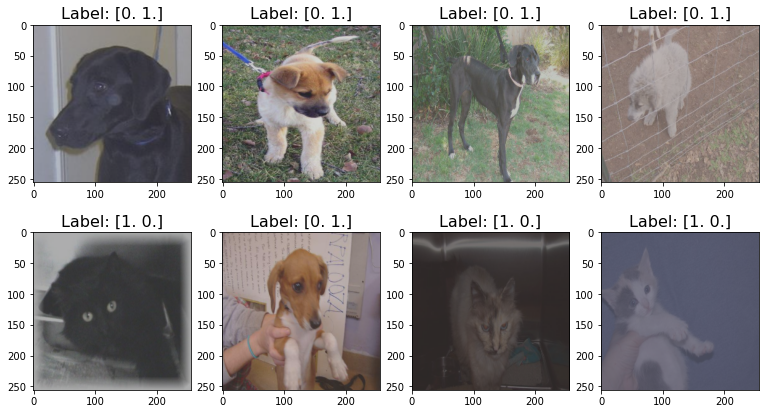

In [59]:
my_plot(dataset.take(8))

* ## 色調 Hue

 * max_delta：調整範圍，0 ~ 1

In [60]:
def my_preprocess(image):
    image = cv2.resize(image, (256, 256))
    image = tf.image.random_hue(image,
                  max_delta=0.4)  #-0.4 ~ +0.4 
    image = tf.cast(image, tf.uint8)
    return image

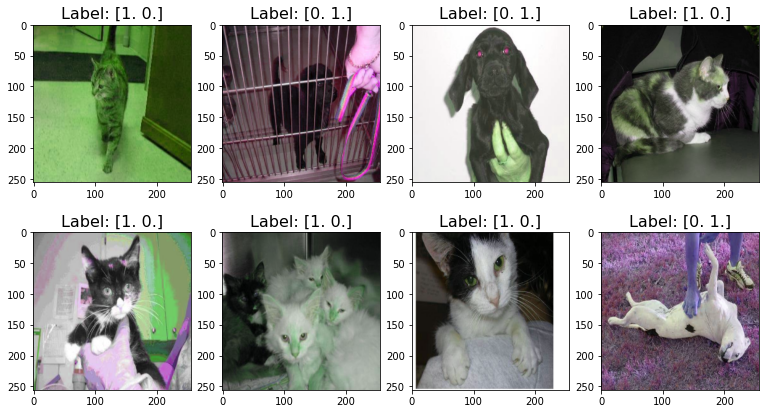

In [61]:
my_plot(dataset.take(8))

[(back...)](#本章節大綱)

* ## 飽和度 Saturation

 * lower：飽和度下限
 * upper：飽和度上限

In [62]:
def my_preprocess(image):
    image = cv2.resize(image, (256, 256))
    image = tf.image.random_saturation(image,
                      lower=2,
                      upper=5)
    image = tf.cast(image, tf.uint8)
    return image

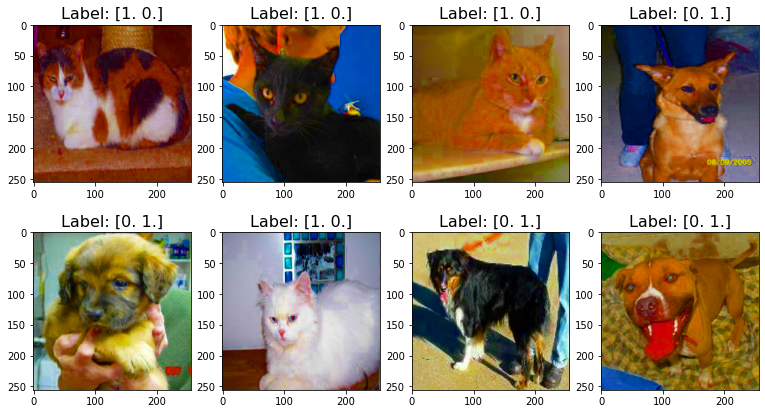

In [63]:
my_plot(dataset.take(8))

[(back...)](#本章節大綱)

* ## 品質 Quality
 * min_jpeg_quality：品質下限，0 ~ 100
 * max_jpeg_quality：品質上限，0 ~ 100

In [64]:
def my_preprocess(image):
    image = cv2.resize(image, (256, 256))
    image = tf.image.random_jpeg_quality(image,
            min_jpeg_quality=0,
            max_jpeg_quality=100)
    image = tf.cast(image, tf.uint8)
    return image

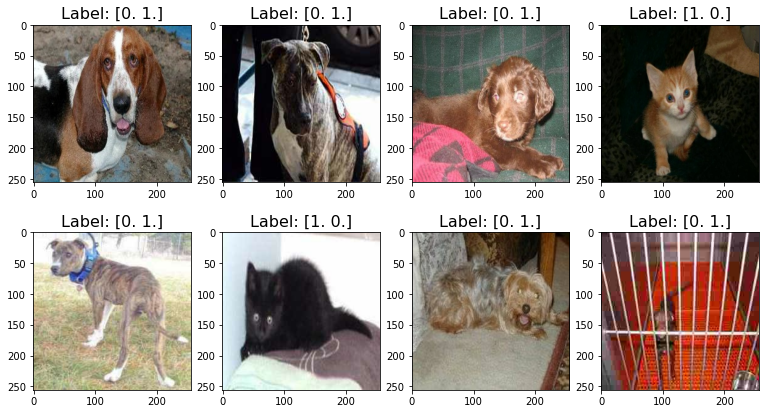

In [65]:
my_plot(dataset.take(8))

[(back...)](#本章節大綱)

* ## 翻轉 Flip

 * random_flip_left_right：隨機水平翻轉
 * random_flip_up_down：隨機垂直翻轉


In [66]:
def my_preprocess(image):
    image = cv2.resize(image, (256, 256))
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_flip_up_down(image)
    image = tf.cast(image, tf.uint8)
    return image

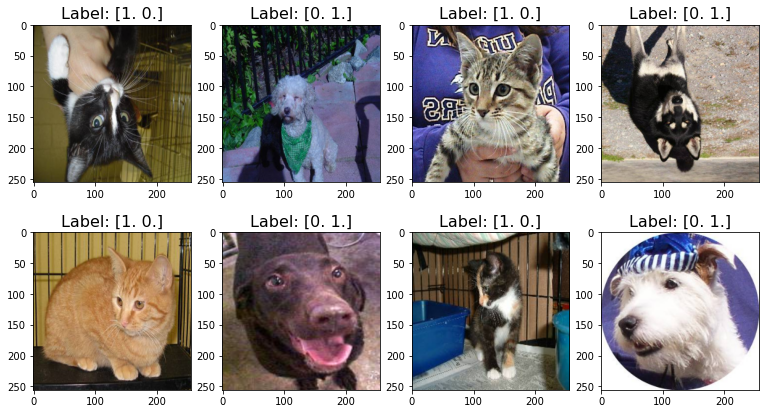

In [67]:
my_plot(dataset.take(8))

## 重新定義 preprocess function

In [68]:
def my_preprocess(image):
    image = cv2.resize(image, (256, 256))
    return image

* ## 翻轉2 Flip

 * horizontal_and_vertical：隨機水平垂直翻轉
 * vertical：隨機垂直翻轉
 * horizontal：隨機水平翻轉


In [69]:
my_data_augmentation = tf.keras.Sequential(
    [
        layers.RandomFlip("horizontal_and_vertical"),
    ]
)


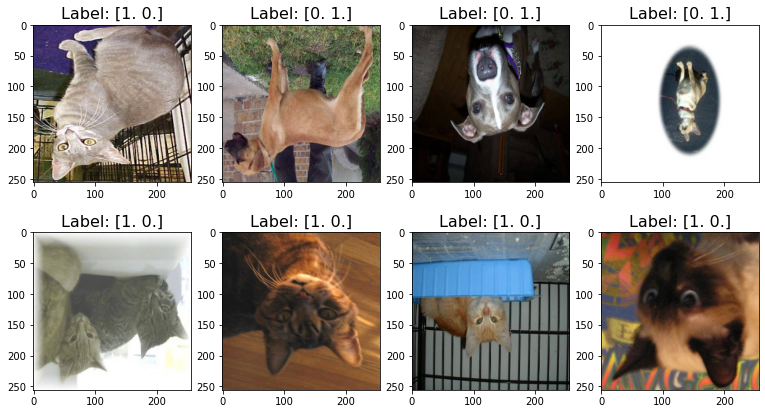

In [71]:
augment_dataset = dataset.map(lambda x, y: (my_data_augmentation(x), y))
my_plot(augment_dataset.take(8))

[(back...)](#本章節大綱)

* ## 旋轉 Rotation

 * factor 旋轉角度，(-0.2, 0.3) 代表從-20% * 2pi ~ 30% * 2pi 的區間縮放 
 * fill_mode：超過邊界填補方法，有 'nearest', 'constant', 'reflect', 'wrap'，四種方法可選擇 (default：'reflect')
 
    - reflect: (d c b a | a b c d | d c b a) The input is extended by reflecting about the edge of the last pixel.
    - constant: (k k k k | a b c d | k k k k) The input is extended by filling all values beyond the edge with the same constant value k = 0.
    - wrap: (a b c d | a b c d | a b c d) The input is extended by wrapping around to the opposite edge.
    - nearest: (a a a a | a b c d | d d d d) The input is extended by the nearest pixel.


In [72]:
my_data_augmentation = tf.keras.Sequential(
    [
        layers.RandomRotation(factor=(-0.3, 0.3),
                    fill_mode="reflect")
    ]
)

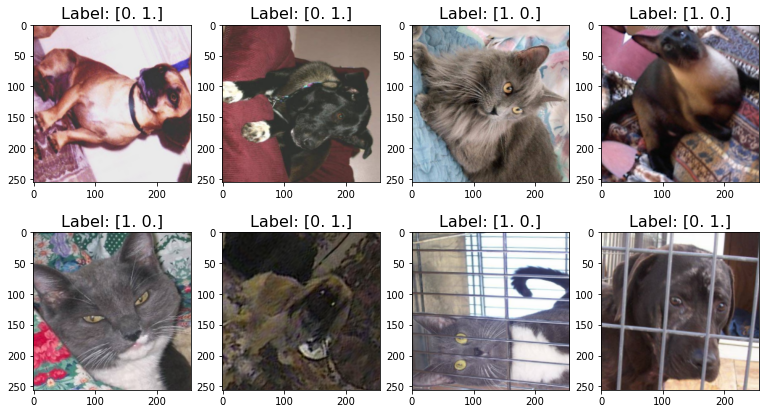

In [73]:
augment_dataset = dataset.map(lambda x, y: (my_data_augmentation(x), y))
my_plot(augment_dataset.take(8))

[(back...)](#本章節大綱)

* ## 裁剪 Crop

 * height：裁減高度 
 * width：裁減寬度


In [ ]:
my_data_augmentation = tf.keras.Sequential(
    [
        layers.RandomCrop(height=100,
                          width=100)
    ]
)

In [ ]:
augment_dataset = dataset.map(lambda x, y: (my_data_augmentation(x), y))
my_plot(augment_dataset.take(8))

[(back...)](#本章節大綱)

* ## 縮放 Zoom
 * height_factor：高度調整比例，(-0.1, 0.1) 代表從-10% ~ 10%的區間縮放
 * width_factor：寬度調整比例，(-0.1, 0.1) 代表從-10% ~ 10%的區間縮放
 * fill_mode：超過邊界填補方法，有 'nearest', 'constant', 'reflect', 'wrap'，四種方法可選擇 (default：'reflect')
     - reflect: (d c b a | a b c d | d c b a) The input is extended by reflecting about the edge of the last pixel.
     - constant: (k k k k | a b c d | k k k k) The input is extended by filling all values beyond the edge with the same constant value k = 0.
     - wrap: (a b c d | a b c d | a b c d) The input is extended by wrapping around to the opposite edge.
     - nearest: (a a a a | a b c d | d d d d) The input is extended by the nearest pixel.

In [ ]:
my_data_augmentation = tf.keras.Sequential(
    [
        layers.RandomZoom(height_factor=(-0.5, 0.5),
                          width_factor=(-0.5, 0.5),
                          fill_mode="nearest")                          
    ]
)

In [ ]:
augment_dataset = dataset.map(lambda x, y: (my_data_augmentation(x), y))
my_plot(augment_dataset.take(8))

[(back...)](#本章節大綱)

* ## 隨機高度 RandomHeight

 * factor：調整比例，(-0.1, 0.1) 代表從-10% ~ 10%的區間縮放
 * interpolation：填補方法


In [ ]:
my_data_augmentation = tf.keras.Sequential(
    [
        layers.RandomHeight(factor=(-0.8, 0.8),
                            interpolation='bilinear')
    ]
)

In [ ]:
augment_dataset = dataset.map(lambda x, y: (my_data_augmentation(x), y))
my_plot(augment_dataset.take(8))

[(back...)](#本章節大綱)

* ## 隨機寬度 RandomWidth

 * factor：調整比例，(-0.1, 0.1) 代表從-10% ~ 10%的區間縮放


In [ ]:
my_data_augmentation = tf.keras.Sequential(
    [
        layers.RandomWidth(factor=(-0.8, 0.8),
                            interpolation='bilinear')
    ]
)

In [ ]:
augment_dataset = dataset.map(lambda x, y: (my_data_augmentation(x), y))
my_plot(augment_dataset.take(8))

[(back...)](#本章節大綱)

* ## 隨機平移 RandomTranslation
 * height_factor：高度調整比例，(-0.1, 0.1) 代表從-10% ~ 10%的區間平移
 * width_factor：寬度調整比例，(-0.1, 0.1) 代表從-10% ~ 10%的區間平移
 * fill_mode：超過邊界填補方法，有 'nearest', 'constant', 'reflect', 'wrap'，四種方法可選擇 (default：'reflect')
     - reflect: (d c b a | a b c d | d c b a) The input is extended by reflecting about the edge of the last pixel.
     - constant: (k k k k | a b c d | k k k k) The input is extended by filling all values beyond the edge with the same constant value k = 0.
     - wrap: (a b c d | a b c d | a b c d) The input is extended by wrapping around to the opposite edge.
     - nearest: (a a a a | a b c d | d d d d) The input is extended by the nearest pixel.

In [ ]:
my_data_augmentation = tf.keras.Sequential(
    [
        layers.RandomTranslation(height_factor=(-0.3, 0.3),
                                 width_factor=(-0.3, 0.3),
                                 fill_mode="reflect")
    ]
)

In [ ]:
augment_dataset = dataset.map(lambda x, y: (my_data_augmentation(x), y))
my_plot(augment_dataset.take(8))

[(back...)](#本章節大綱)

# 整合

In [79]:
def my_preprocess(image):
    print('my_preprocess...all_process')
    image = cv2.resize(image, (256, 256))
    # 亮度
    image = tf.image.random_brightness(image, 
                        max_delta=0.2)
    # 對比度
    image = tf.image.random_contrast(image,
                  lower=0.5,
                                     upper=1)
    # 色調
    image = tf.image.random_hue(image,
                                max_delta=0.4)
    # 飽和度
    image = tf.image.random_saturation(image,
                                       lower=1,
                                       upper=5)
    # 品質
    image = tf.image.random_jpeg_quality(image,
                                         min_jpeg_quality=20,
                                         max_jpeg_quality=100)
    image = tf.cast(image, tf.uint8)
    return image

In [87]:
my_data_augmentation = tf.keras.Sequential(
    [
        # 旋轉
        layers.RandomFlip("horizontal_and_vertical"),
        # 裁剪
        layers.RandomCrop(height = 230,
                      width = 230),
        # 隨機高度
        layers.RandomHeight(factor = (-0.3, 0.3),
                            interpolation = 'bilinear'),
        # 隨機寬度
        layers.RandomWidth(factor = (-0.3, 0.3),
                            interpolation = 'bilinear'),
        # 隨機縮放
        layers.RandomZoom(height_factor = (-0.3, 0.3),
                          width_factor = (-0.3, 0.3),
                          fill_mode = "nearest"),
        # 隨機平移
        layers.RandomTranslation(height_factor = (-0.3, 0.3),
                          width_factor = (-0.3, 0.3),
                          fill_mode = "reflect"),  
        layers.Resizing(height = 256,
                width = 256,
                interpolation='bilinear',
                crop_to_aspect_ratio=False),
                      
    ]
)

my_preprocess...all_process
my_preprocess...all_process
my_preprocess...all_process
my_preprocess...all_process
my_preprocess...all_process
my_preprocess...all_process
my_preprocess...all_process
my_preprocess...all_process


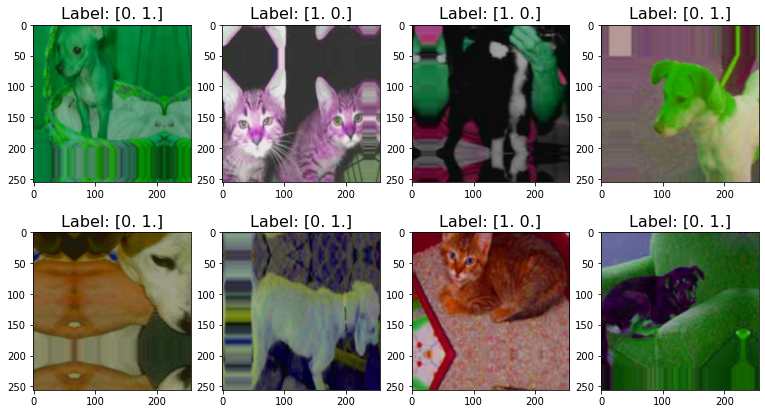

In [88]:
augment_dataset = dataset.map(lambda x, y: (my_data_augmentation(x), y))
my_plot(augment_dataset.take(8))